In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
def unpickle(path):
    return pickle.load(open(path, 'rb'))

In [3]:
courses = unpickle("./yaleocw-corpus/data/courses.pickle")
courses.head(2)

,Department,Course Number,Course Title,Professor Name,Date,Url,Author,Description,Sessions,Material Url,Course Structure
Cid,,,,,,,,,,,
0,African American Studies,AFAM 162,African American History: From Emancipation to...,Jonathan Holloway,Spring 2010,https://oyc.yale.edu//african-american-studies...,"{'name': 'Professor Jonathan Holloway', 'descr...",The purpose of this course is to examine the A...,"[{'title': 'Dawn of Freedom', 'url': 'https://...",http://openmedia.yale.edu/cgi-bin/open_yale/me...,"This Yale College course, taught on campus twi..."
1,American Studies,AMST 246,"Hemingway, Fitzgerald, Faulkner",Wai Chee Dimock,Fall 2011,https://oyc.yale.edu//american-studies/amst-246,"{'name': 'Professor Wai Chee Dimock', 'descrip...","This course examines major works by Hemingway,...","[{'title': 'Introduction', 'url': 'https://oyc...",http://openmedia.yale.edu/cgi-bin/open_yale/me...,"This Yale College course, taught on campus two..."


In [4]:
sessions = unpickle("./yaleocw-corpus/data/sessions.pickle")
sessions.head(2)

,Cid,Course Number,Number In Series,Title,Chapters,Transcriptions,Url,Description,Video,Ressources
Sid,,,,,,,,,,
0,0,AFAM 162,Lecture 1,Dawn of Freedom,"[(Chapter 1. Frederick Douglass’ Speech, Deliv...",[Professor Jonathan Holloway : \n “Fellow citi...,https://oyc.yale.edu//african-american-studies...,Professor Holloway offers an introduction to t...,{'url': 'http://openmedia.yale.edu/projects/co...,[{'url': 'https://oyc.yale.edu/sites/default/f...
1,0,AFAM 162,Lecture 2,Dawn of Freedom (continued),[(Chapter 1. Introduction and Recap of Last Cl...,"[Professor Jonathan Holloway : Yesterday, Mond...",https://oyc.yale.edu//african-american-studies...,"In this lecture, Professor Holloway gives a br...",{'url': 'http://openmedia.yale.edu/projects/co...,[{'url': 'https://oyc.yale.edu/sites/default/f...


In [5]:
len(sessions.Transcriptions[0])

6

In [6]:
def splitTranscripts(session, n = 4, sep = "."):
    _splits = []
    for _chapter in session:
        _sentences = _chapter.split(sep)
        _step = len(_sentences)/n
        _start, _end = 0, _step
        while _end<len(_sentences):
            _splits.append(sep.join(_sentences[int(_start):int(_end)]))
            _start = _end
            _end += _step
        _splits.append(sep.join(_sentences[int(_start):]))
    return _splits

In [7]:
import gensim

In [8]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

In [2]:
def averageVector(sentence):
    _vector = np.zeros(shape=(model.vector_size))
    _c = 0
    for _word in sentence.split(" "):
        if(_word in model.vocab):
            _vector += model.get_vector(_word)
        _c += 1
    return _vector/_c

def dist(sampleA, sampleB):
    _e = 0
    for _f in range(len(sampleA)):
        _e =+ pow(sampleA[_f]-sampleB[_f], 2)
    return _e

In [10]:
_transcripts = sessions.groupby("Cid")
_vectors = []

for _i, _course in _transcripts:
    _c = []
    for _session in _course.Transcriptions:
        if _session is None:
            break
        if len(_session) < 1:
            break
        for _splitchapter in splitTranscripts(_session, n=6):
            _c.append(averageVector(_splitchapter))
    _vectors.append(_c)


In [13]:
label = []
matrix = []
co_in, ch_in = (6,16), (25,30) 
for _cid, _course in enumerate(_vectors[co_in[0]:co_in[1]], co_in[0]):
    for _chapid, _chapter in enumerate(_course[ch_in[0]:ch_in[1]], ch_in[0]):
        print(str(_cid)+":"+str(_chapid))
        label.append(str(_cid)+":"+str(_chapid))
        _l = []
        for _bcid, _bcourse in enumerate(_vectors[co_in[0]:co_in[1]], co_in[0]):
            for _bchapid, _bchapter in enumerate(_bcourse[ch_in[0]:ch_in[1]], ch_in[0]):
                _l.append(dist(_chapter, _bchapter))
        matrix.append(_l)

6:25
6:26
6:27
6:28
6:29
7:25
7:26
7:27
7:28
7:29
8:25
8:26
8:27
8:28
8:29
9:25
9:26
9:27
9:28
9:29
10:25
10:26
10:27
10:28
10:29
11:25
11:26
11:27
11:28
11:29
12:25
12:26
12:27
12:28
12:29
13:25
13:26
13:27
13:28
13:29
14:25
14:26
14:27
14:28
14:29
15:25
15:26
15:27
15:28
15:29


In [14]:
import matplotlib
import matplotlib.pyplot as plt

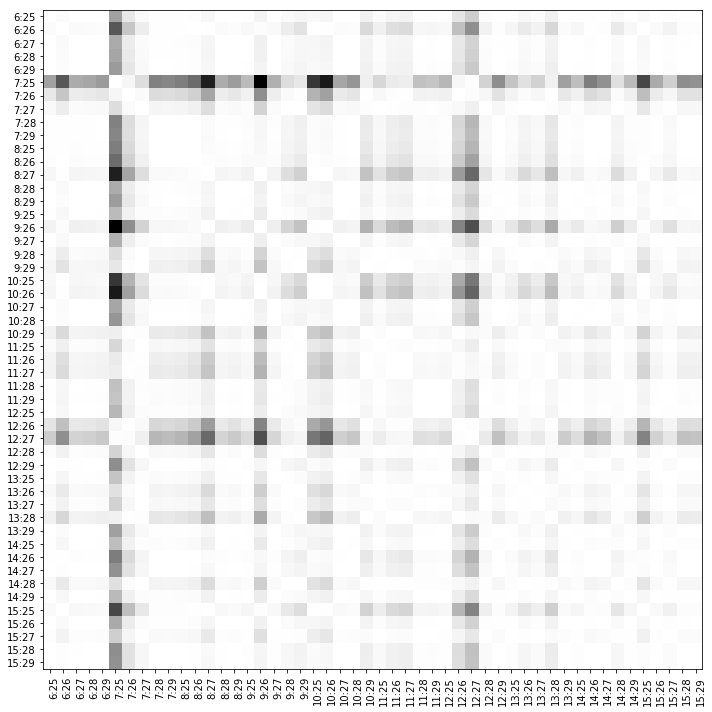

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(matrix, cmap="Greys")

# We want to show all ticks...
ax.set_xticks(np.arange(len(label)))
ax.set_yticks(np.arange(len(label)))
# ... and label them with the respective list entries
ax.set_xticklabels(label)
ax.set_yticklabels(label)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

In [ ]:
pickle.dump(_vectors, open("vectors_gnews.pickle", 'wb'))